In [ ]:
# Ashley Mayo
# Airbnb Price Predictor Project
# DSC:680 Applied Data Science
# April 9th, 2025

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Display basic info
print(df.shape)
df.head()

# Check data types and missing values
df.info()

# Summary statistics
df.describe(include='all')

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [3]:
# Drop unnecessary columns
df.drop(columns=['id', 'name', 'host_name', 'last_review', 'latitude', 'longitude'], inplace=True)

# Fill missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Remove price outliers
df = df[df['price'] > 0]
df = df[df['price'] < 1000]

# Remove listings with unrealistic minimum nights
df = df[df['minimum_nights'] <= 30]

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (47867, 10)


In [4]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

In [ ]:
# Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R^2:", r2_score(y_test, y_pred_rf))

In [ ]:
# Initialize and fit the model
gb = HistGradientBoostingRegressor(max_iter=100, random_state=42)
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print("MAE:", mae_gb)
print("RMSE:", rmse_gb)
print("R^2:", r2_gb)

In [ ]:
# Set the style for plots
sns.set(style="whitegrid")

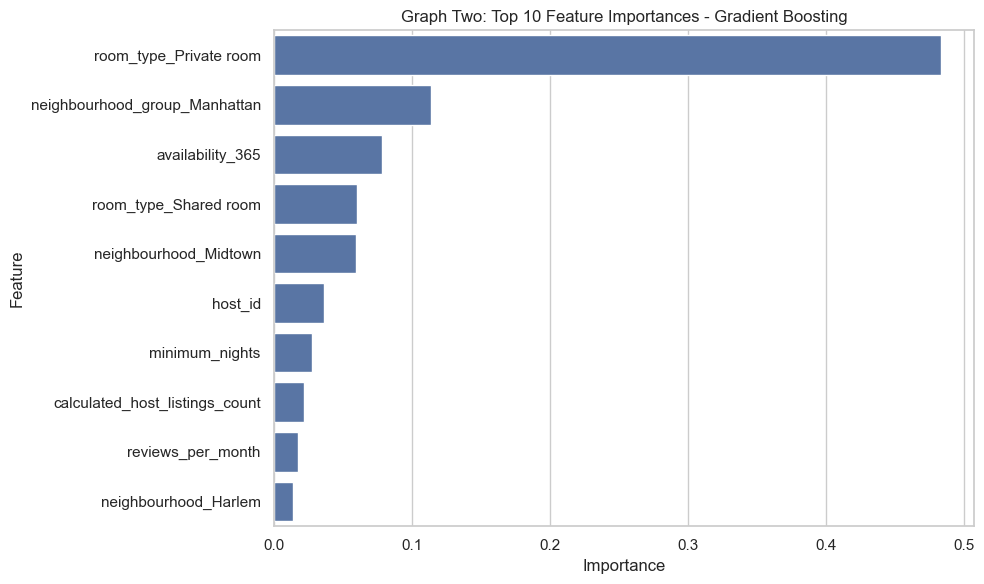

In [17]:
gb2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb2.fit(X_train, y_train)

# Plot feature importance
importances = gb2.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Graph Two: Top 10 Feature Importances - Gradient Boosting')
plt.tight_layout()
plt.show()

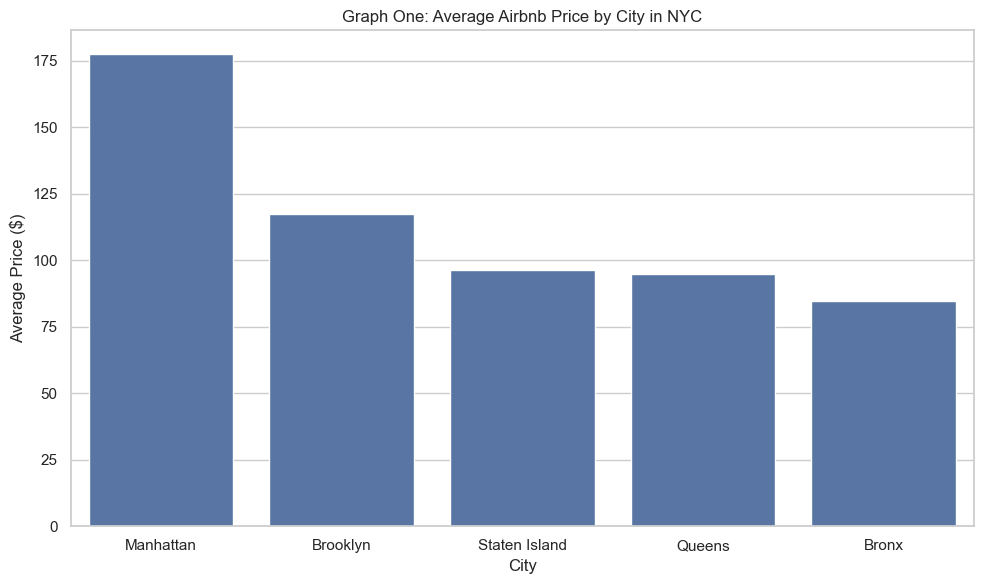

In [18]:
# Average Price by Borough
plt.figure(figsize=(10, 6))
borough_avg = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=borough_avg.index, y=borough_avg.values)
plt.title('Graph One: Average Airbnb Price by City in NYC')
plt.xlabel('City')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

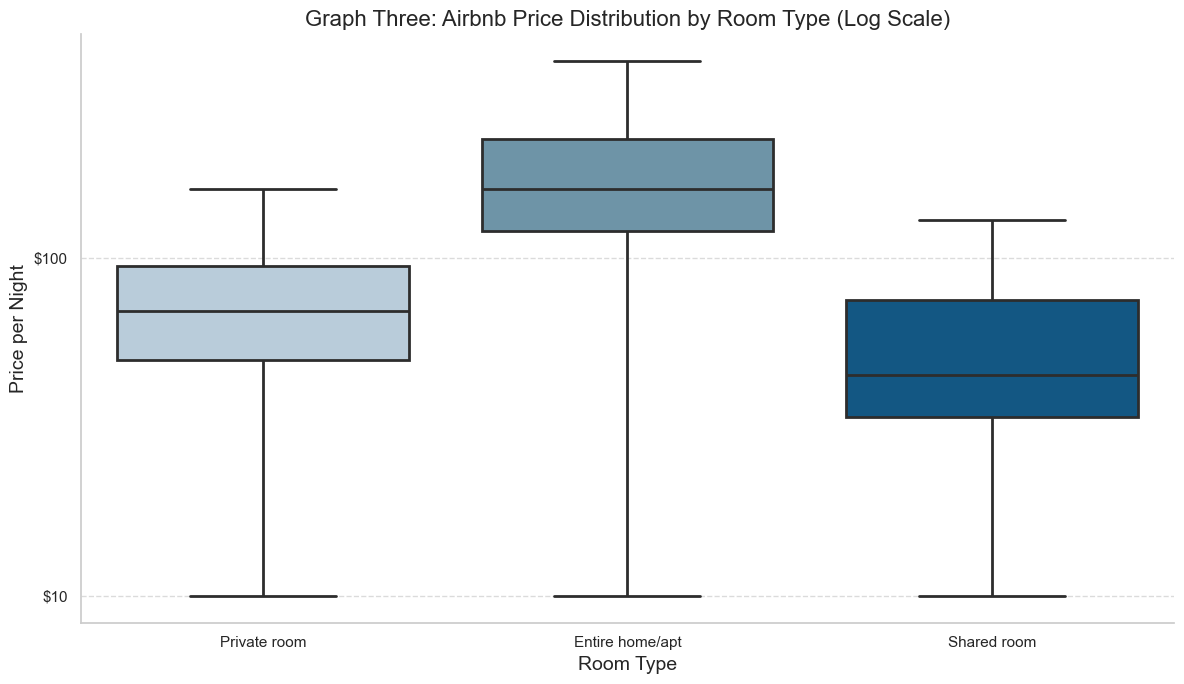

In [24]:
# Set figure size
plt.figure(figsize=(12, 7))
blue_palette = ['#b3cde0', '#6497b1', '#005b96']
sns.boxplot(
    x='room_type',
    y='price',
    hue='room_type',
    data=df,
    palette=blue_palette,
    showfliers=False,
    linewidth=2,
    dodge=False,  # Prevents duplication since hue and x are same
    legend=False  # Suppress automatic legend since x and hue are same
)

# Log scale for y-axis
plt.yscale('log')
# Format y-axis ticks to show dollar values
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '${:,.0f}'.format(y)))
plt.title('Graph Three: Airbnb Price Distribution by Room Type (Log Scale)', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price per Night', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

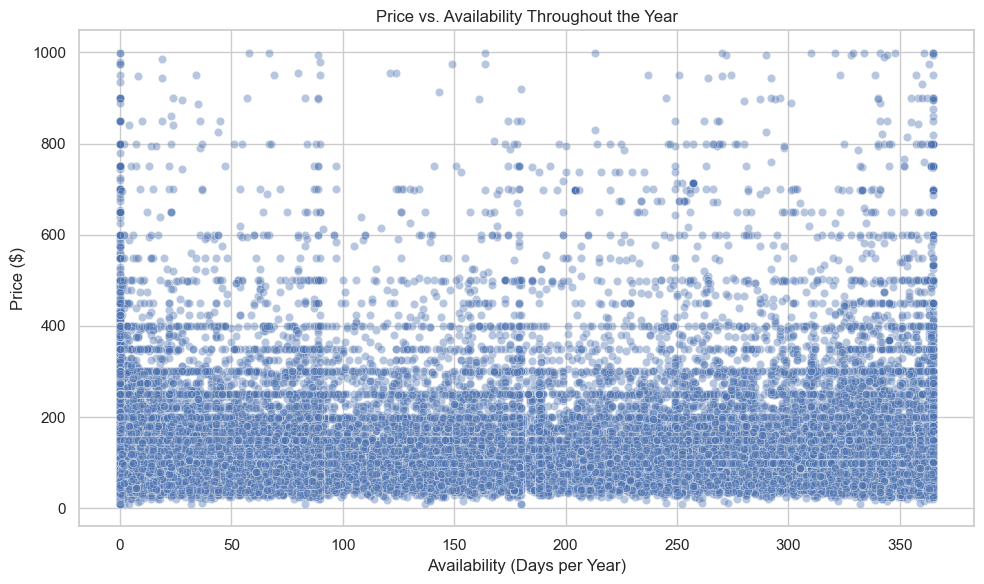

In [12]:
# Availability vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.4)
plt.title('Price vs. Availability Throughout the Year')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

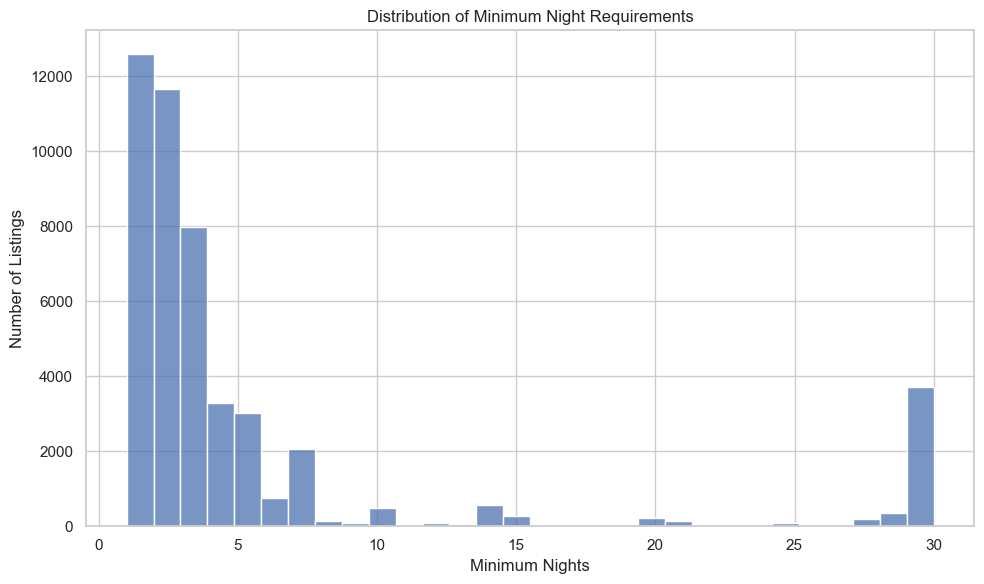

In [13]:
# Minimum Nights Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=30, kde=False)
plt.title('Distribution of Minimum Night Requirements')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

In [14]:
# Prepare the data again (already encoded from before)
X = df_model.drop('price', axis=1)
y = df_model['price']

# Apply log transformation to the target variable
y_log = np.log1p(y)  # log1p handles log(0) by computing log(1 + x)

# Split the transformed data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the Gradient Boosting model on log-transformed target
model_log = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_log.fit(X_train, y_train_log)

# Predict and transform predictions back to original scale
y_pred_log = model_log.predict(X_test)
y_pred_original = np.expm1(y_pred_log)  # inverse of log1p
y_test_original = np.expm1(y_test_log)

# Plot actual vs. predicted on original price scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.4)
plt.plot([0, 1000], [0, 1000], '--r')  # perfect prediction line
plt.title('Actual vs. Predicted Airbnb Prices (Log-Transformed Target)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

# Evaluate performance
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

mae, rmse, r2

NameError: name 'df_model' is not defined

In [40]:
# Feature importance from Gradient Boosting
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)